In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')   

In [2]:
df = pd.read_csv('traffic_accidents.csv')

In [3]:
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [4]:
df.tail()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
209301,09/13/2023 01:08:00 PM,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,13,4,9
209302,07/18/2023 02:10:00 PM,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,14,3,7
209303,10/23/2019 01:32:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,2.0,0.0,2.0,0.0,0.0,0.0,13,4,10
209304,06/01/2020 03:23:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,15,2,6
209305,12/16/2022 12:10:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,FOUR WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,12,6,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [6]:
df.describe()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


In [7]:
df.columns

Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')

In [8]:
df.shape

(209306, 24)

In [9]:
df.isnull().sum() #There is no missing data in the dataset.

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [10]:
df.nunique()

crash_date                       189087
traffic_control_device               19
weather_condition                    12
lighting_condition                    6
first_crash_type                     18
trafficway_type                      20
alignment                             6
roadway_surface_cond                  7
road_defect                           7
crash_type                            2
intersection_related_i                2
damage                                3
prim_contributory_cause              40
num_units                            11
most_severe_injury                    5
injuries_total                       19
injuries_fatal                        4
injuries_incapacitating               8
injuries_non_incapacitating          19
injuries_reported_not_evident        13
injuries_no_indication               39
crash_hour                           24
crash_day_of_week                     7
crash_month                          12
dtype: int64

In [11]:
df.isna().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

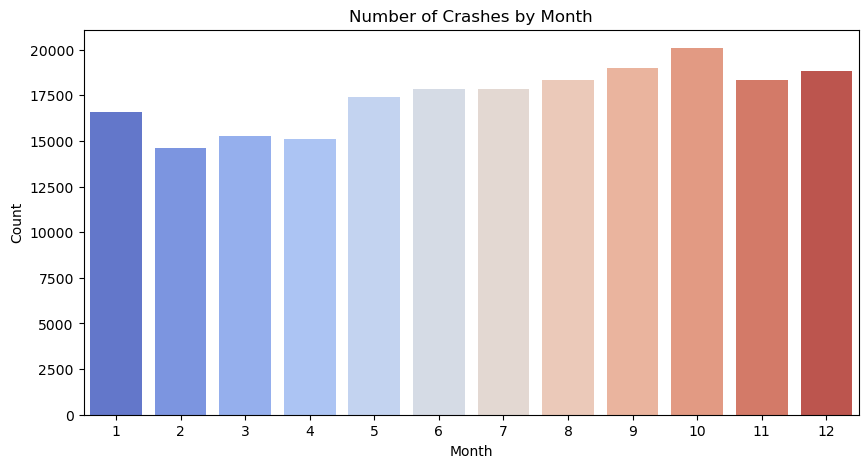

In [12]:
#Univariate Analysis (Count of crashes by month)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="crash_month", palette="coolwarm")
plt.title("Number of Crashes by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

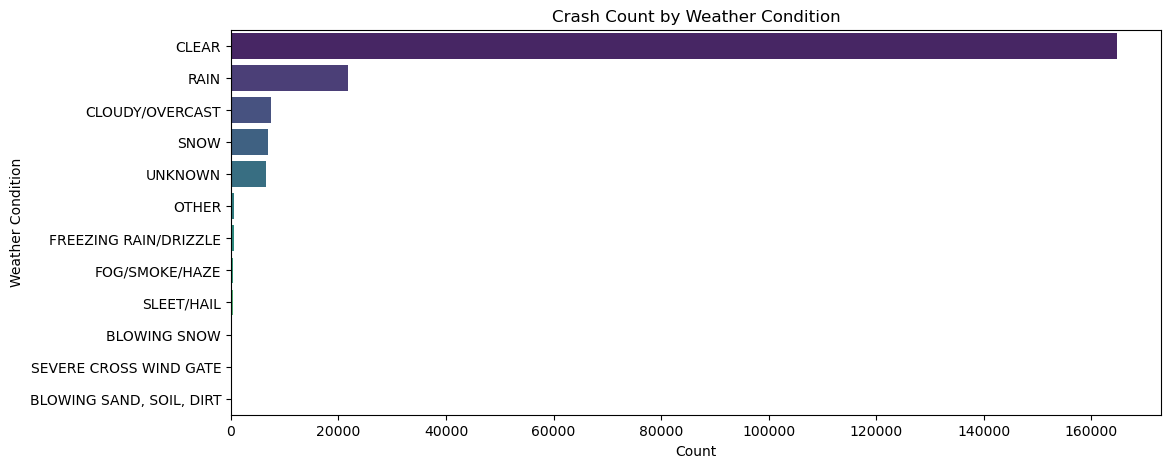

In [13]:
plt.figure(figsize=(12, 5))
sns.countplot(y=df["weather_condition"], order=df["weather_condition"].value_counts().index, palette="viridis")
plt.title("Crash Count by Weather Condition")
plt.xlabel("Count")
plt.ylabel("Weather Condition")
plt.show()

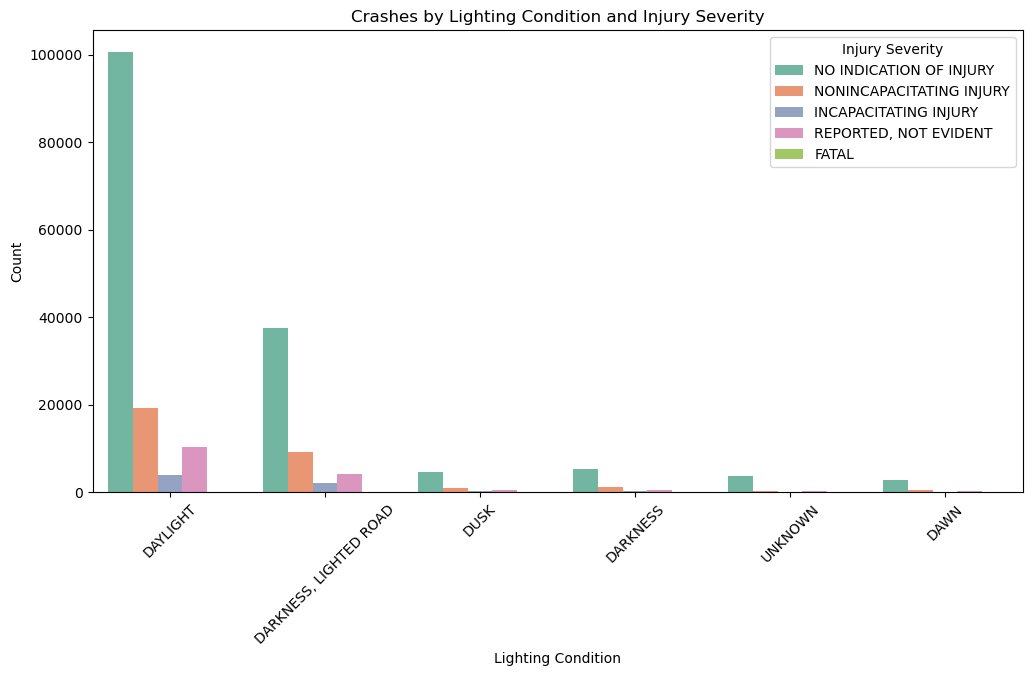

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="lighting_condition", hue="most_severe_injury", palette="Set2")
plt.xticks(rotation=45)
plt.title("Crashes by Lighting Condition and Injury Severity")
plt.xlabel("Lighting Condition")
plt.ylabel("Count")
plt.legend(title="Injury Severity")
plt.show()

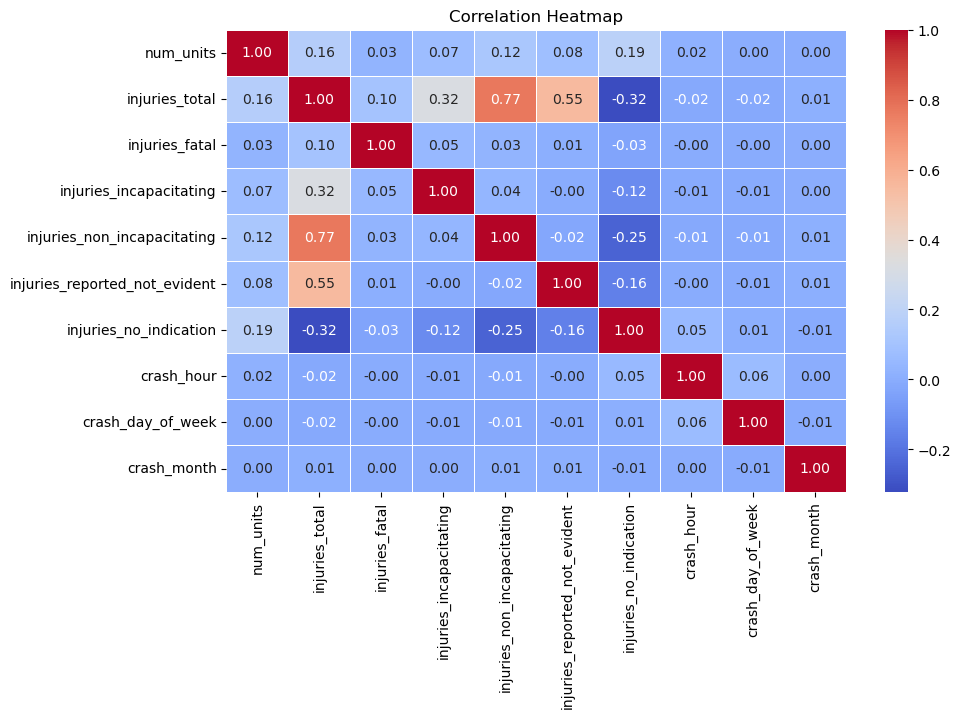

In [16]:
# Convert 'crash_date' to datetime format
df["crash_date"] = pd.to_datetime(df["crash_date"], errors="coerce")

# Selecting only numeric columns for correlation analysis
num_cols = df.select_dtypes(include=["number"])

# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(num_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



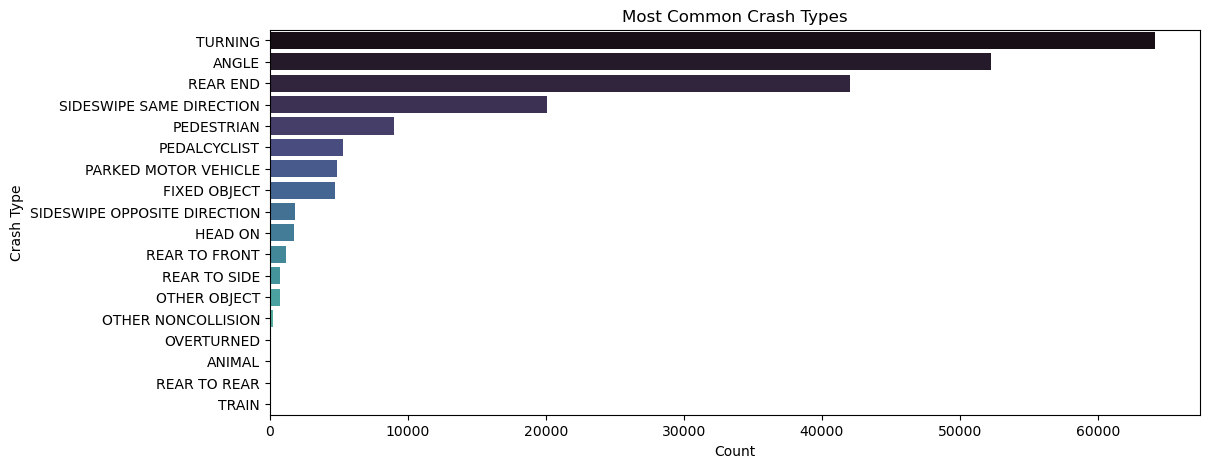

In [17]:
plt.figure(figsize=(12, 5))
sns.countplot(y=df["first_crash_type"], order=df["first_crash_type"].value_counts().index, palette="mako")
plt.title("Most Common Crash Types")
plt.xlabel("Count")
plt.ylabel("Crash Type")
plt.show()

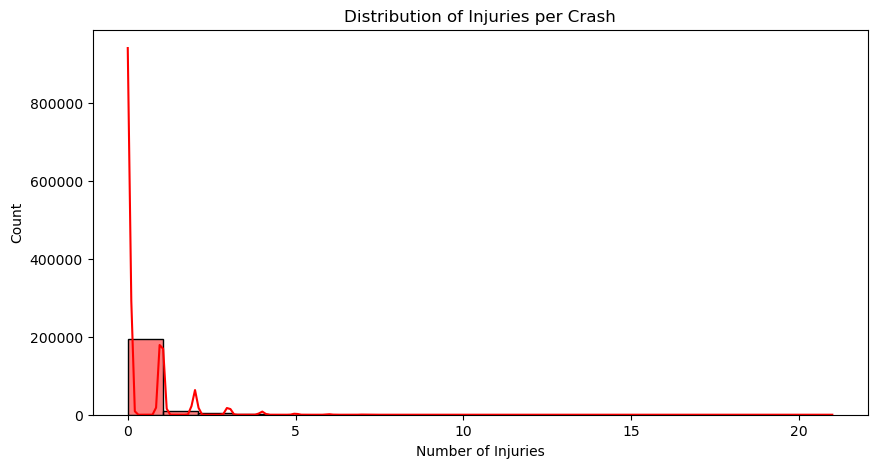

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(df["injuries_total"], bins=20, kde=True, color="red")
plt.title("Distribution of Injuries per Crash")
plt.xlabel("Number of Injuries")
plt.ylabel("Count")
plt.show()

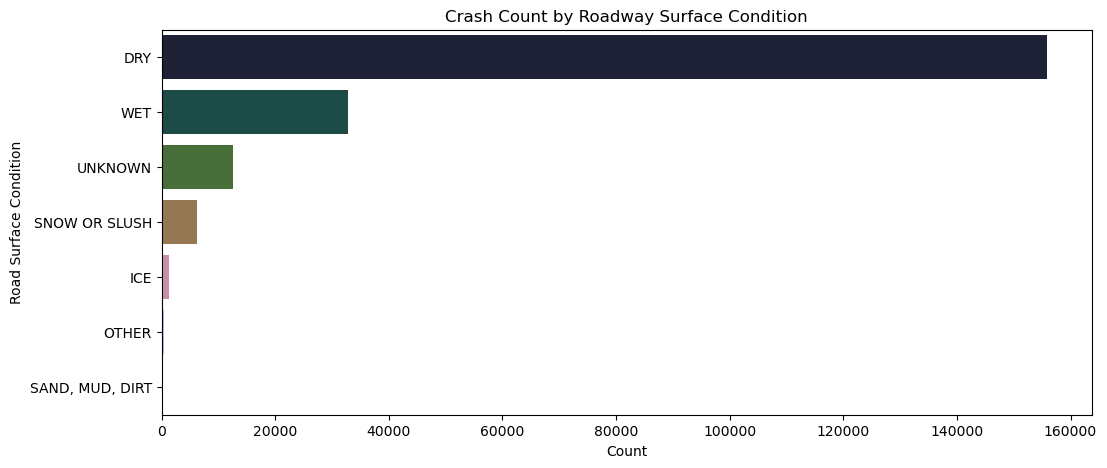

In [18]:
plt.figure(figsize=(12, 5))
sns.countplot(y=df["roadway_surface_cond"], order=df["roadway_surface_cond"].value_counts().index, palette="cubehelix")
plt.title("Crash Count by Roadway Surface Condition")
plt.xlabel("Count")
plt.ylabel("Road Surface Condition")
plt.show()


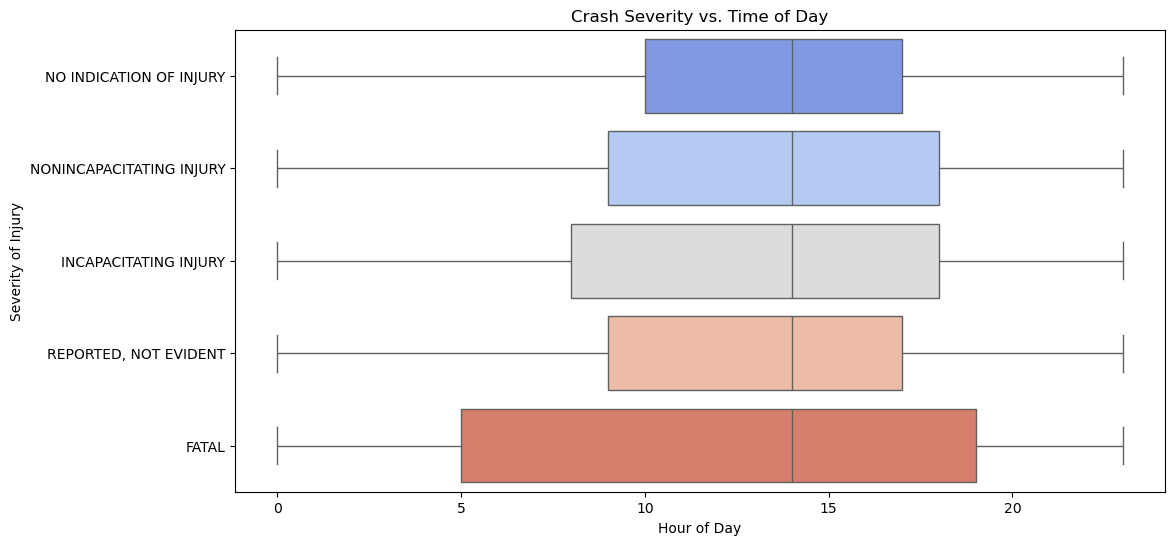

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["crash_hour"], y=df["most_severe_injury"], palette="coolwarm")
plt.title("Crash Severity vs. Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Severity of Injury")
plt.show()

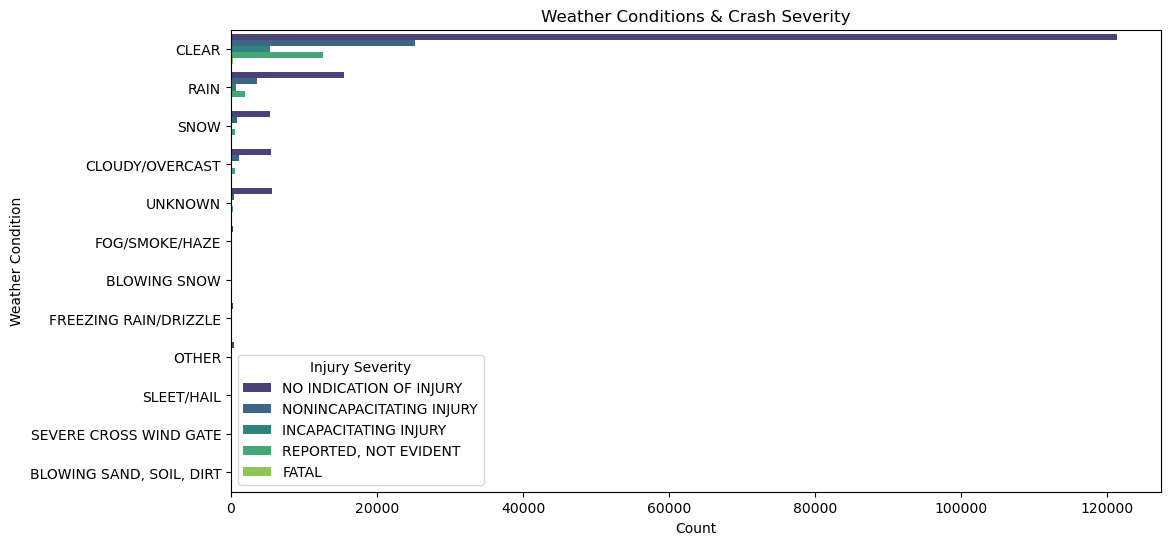

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df["weather_condition"], hue=df["most_severe_injury"], palette="viridis")
plt.title("Weather Conditions & Crash Severity")
plt.xlabel("Count")
plt.ylabel("Weather Condition")
plt.legend(title="Injury Severity")
plt.show()

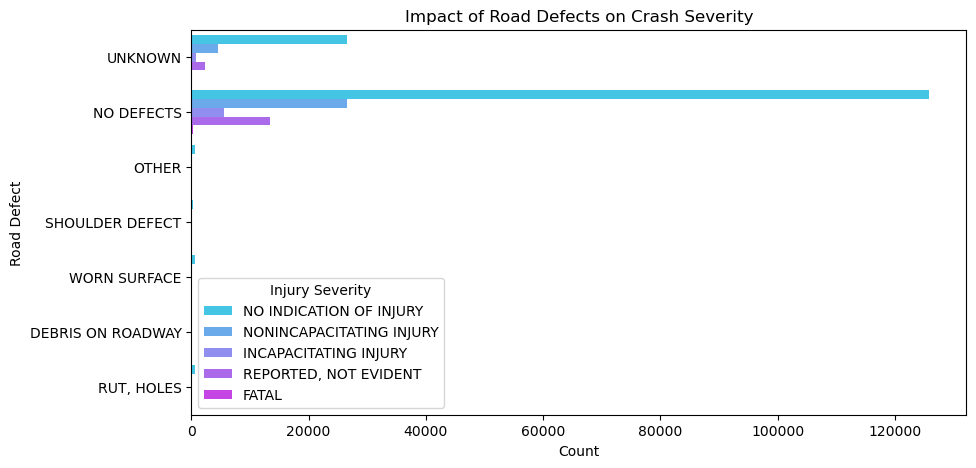

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="road_defect", hue="most_severe_injury", palette="cool")
plt.title("Impact of Road Defects on Crash Severity")
plt.xlabel("Count")
plt.ylabel("Road Defect")
plt.legend(title="Injury Severity")
plt.show()






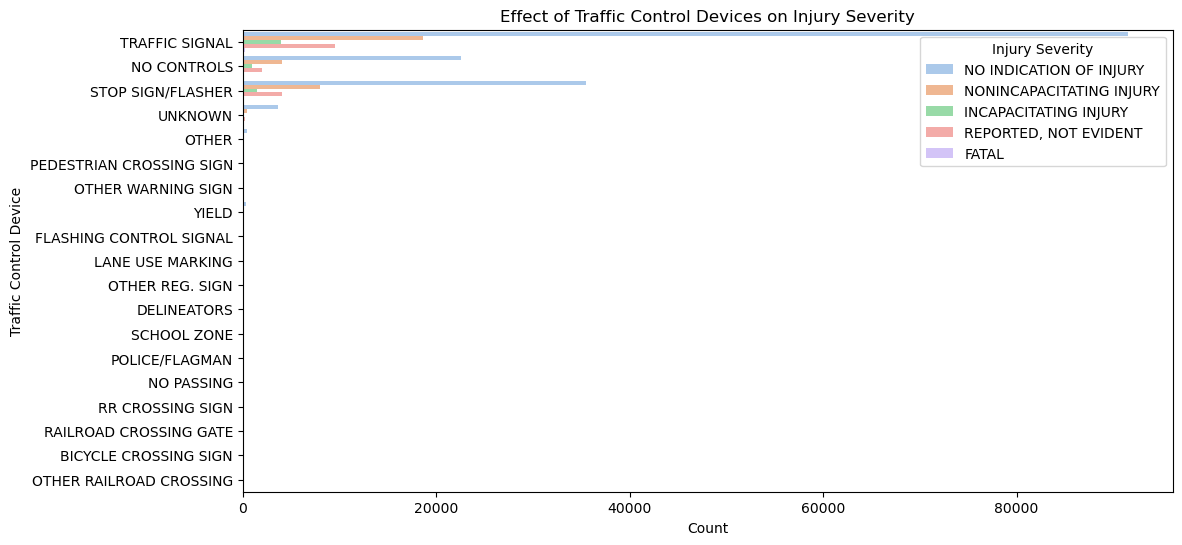

In [24]:
# ----------------------------------------
# 1️⃣1️⃣ Traffic Control Device & Injury Severity
plt.figure(figsize=(12, 6))
sns.countplot(y=df["traffic_control_device"], hue=df["most_severe_injury"], palette="pastel")
plt.title("Effect of Traffic Control Devices on Injury Severity")
plt.xlabel("Count")
plt.ylabel("Traffic Control Device")
plt.legend(title="Injury Severity")
plt.show()

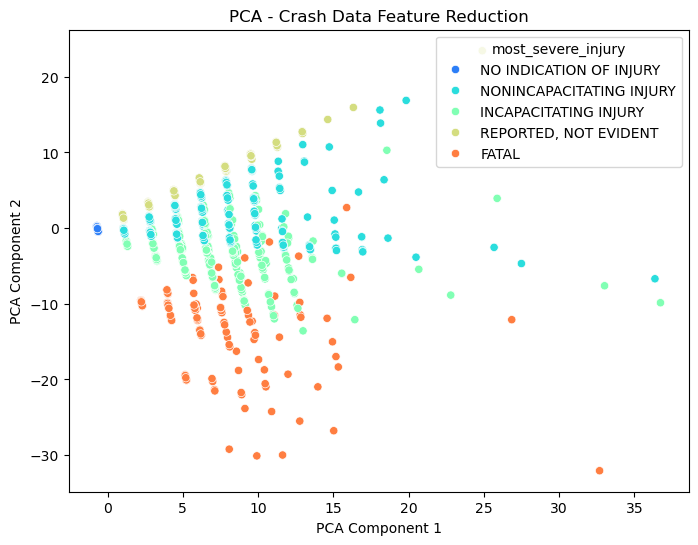

In [26]:

# ----------------------------------------
# 1️⃣3️⃣ PCA for Feature Reduction (Multivariate Analysis)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting numerical features
num_cols = ['injuries_total', 'injuries_fatal', 'injuries_incapacitating', 
            'injuries_non_incapacitating', 'injuries_reported_not_evident', 'crash_hour']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_cols])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["most_severe_injury"], palette="rainbow")
plt.title("PCA - Crash Data Feature Reduction")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()